In [16]:
from google.colab import drive

# Mount the drive
drive.mount('/content/drive/')

# Access a file in Google Drive
file_path = '/content/drive/My Drive/Ajay Majhi/Psoriasis detectio/PSORIASIS AND NORMAL SKIN'

# Read the file
# with open(file_path, 'r') as file:
#     print(file.read())


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [17]:
dataset='/content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN'

In [18]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [18]:
# A "VGG16 model without the top layer" refers to loading the VGG16 convolutional neural network architecture,
# but excluding the fully connected layers at the very top of the model

In [19]:
# Load pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False)

In [20]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [21]:
# Add custom classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # 2 neurons for binary classification

In [22]:
# Combine base model and custom layers into a new model
model = Model(inputs=base_model.input, outputs=predictions)

In [23]:
# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [64]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,6

 Total params: 14,912,456 (56.89 MB)

 Trainable params: 65,922 (257.51 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 131,846 (515.03 KB)

In [24]:
# Define data generators
image_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [25]:
# Load training data
train_data_loader = image_datagen.flow_from_directory(
    directory=dataset,
    target_size=(224, 224),  # VGG16 input size
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

Found 2246 images belonging to 2 classes.


In [26]:
len(dataset)

79

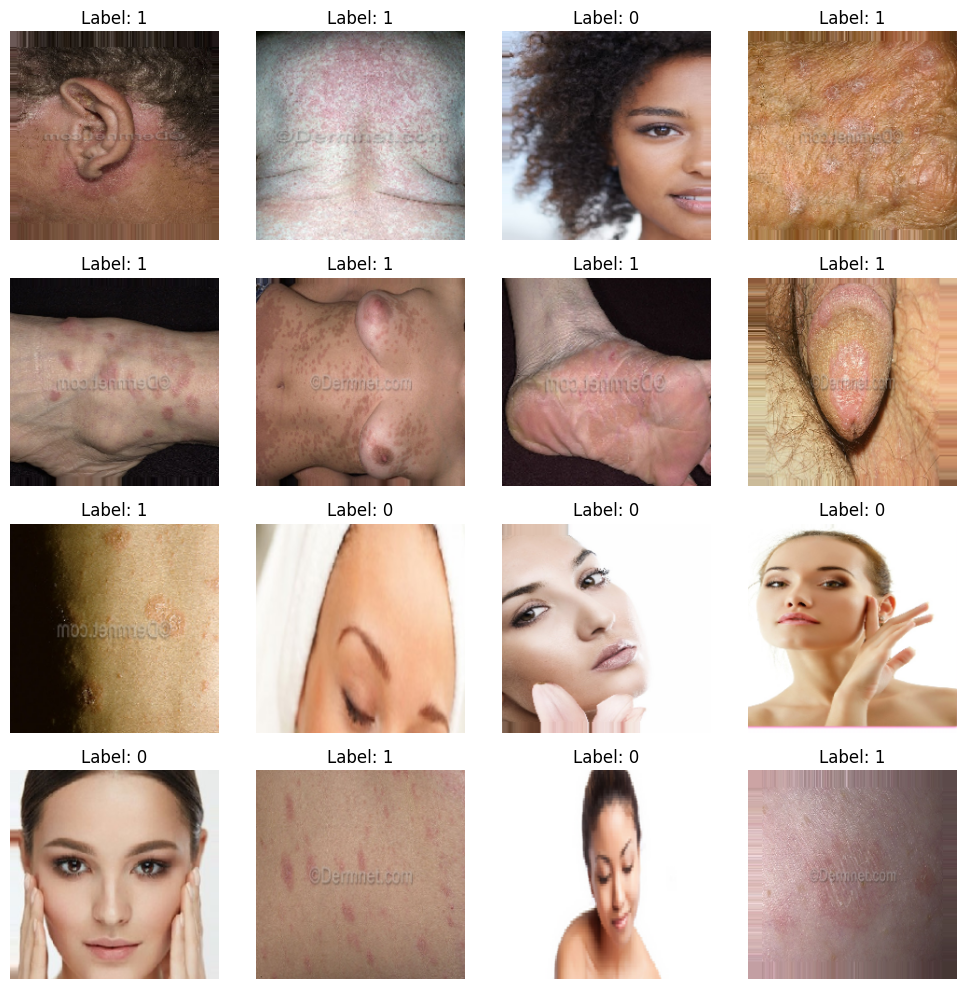

In [27]:
# prompt: Visualize some of the images from our dataset

import matplotlib.pyplot as plt

# Get a batch of images and labels from the training data loader
images, labels = next(train_data_loader)

# Display some images from the batch
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(16):
  ax = axes[i // 4, i % 4]
  ax.imshow(images[i])
  ax.set_title(f"Label: {int(labels[i])}")  # Assuming binary labels 0 or 1
  ax.axis('off')

plt.tight_layout()
plt.show()

In [28]:
# Load validation data
val_data_loader = image_datagen.flow_from_directory(
    directory=dataset,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 560 images belonging to 2 classes.


In [ ]:
# Load pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False)

In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Add custom classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)  # 2 neurons for binary classification

In [ ]:
# Combine base model and custom layers into a new model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,6

 Total params: 14,780,610 (56.38 MB)

 Trainable params: 65,922 (257.51 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [30]:
# Train the model
history = model.fit(
    train_data_loader,
    validation_data=val_data_loader,
    epochs=10,
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 77s 820ms/step - accuracy: 0.7953 - loss: 0.4769 - val_accuracy: 0.8071 - val_loss: 0.3577
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 49s 647ms/step - accuracy: 0.9309 - loss: 0.1940 - val_accuracy: 0.9268 - val_loss: 0.2408
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 82s 640ms/step - accuracy: 0.9588 - loss: 0.1279 - val_accuracy: 0.9018 - val_loss: 0.2422
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 47s 619ms/step - accuracy: 0.9649 - loss: 0.1176 - val_accuracy: 0.9464 - val_loss: 0.1676
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 82s 627ms/step - accuracy: 0.9709 - loss: 0.0958 - val_accuracy: 0.9625 - val_loss: 0.1364
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 83s 637ms/step - accuracy: 0.9754 - loss: 0.0796 - val_accuracy: 0.9357 - val_loss: 0.1646
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 82s 636ms/step - accuracy: 0.9735 - loss: 0.0746 - val_accuracy: 0.9679 - val_loss: 0.1132
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 47s 627ms/step - accuracy: 0.9810 - loss: 0.0648 - val_accuracy: 0.923

In [31]:
# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

In [32]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(val_data_loader, verbose=2)

18/18 - 9s - 528ms/step - accuracy: 0.9643 - loss: 0.1098


In [33]:
# Print evaluation metrics
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9642857313156128


In [34]:
# Extract true labels
true_labels = val_data_loader.classes

In [35]:
# Predict test data
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
test_pred = model.predict(val_data_loader)
test_pred_classes = np.argmax(test_pred, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 471ms/step


In [36]:
# Print classification report
print(classification_report(true_labels, test_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95       210
           1       0.95      0.99      0.97       350

    accuracy                           0.96       560
   macro avg       0.97      0.95      0.96       560
weighted avg       0.96      0.96      0.96       560



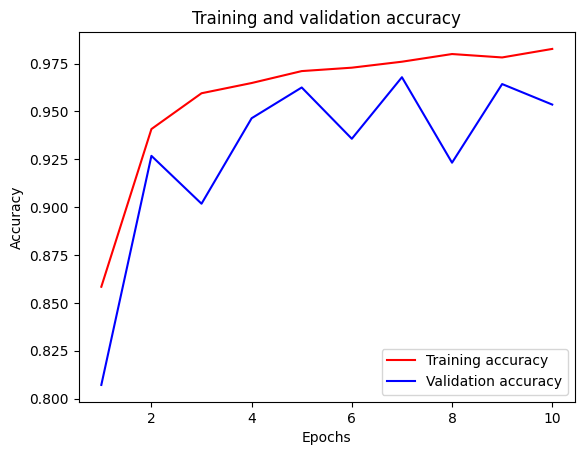

In [37]:
# Plot training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

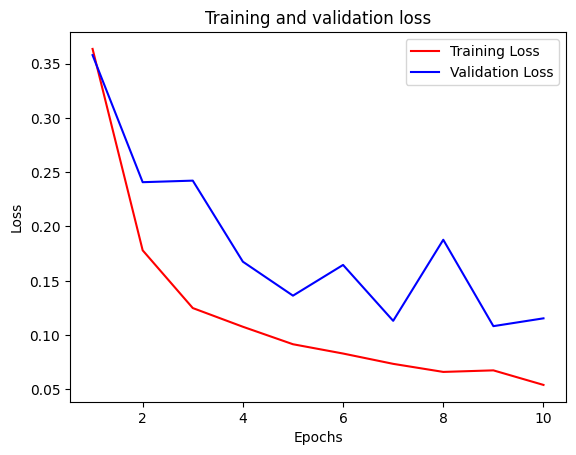

In [38]:
# Plot training and validation loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

[[192  18]
 [  4 346]]


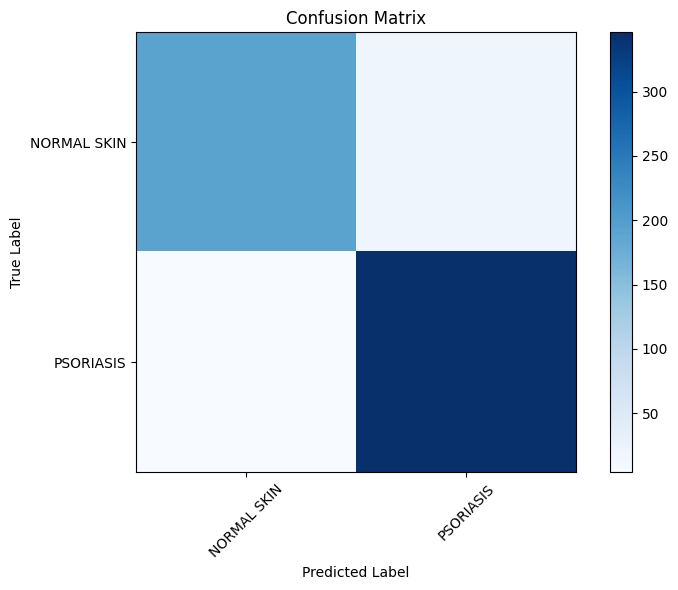

In [39]:
# Plot confusion matrix
confusion_mtx = confusion_matrix(true_labels, test_pred_classes)
print(confusion_mtx)

plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(val_data_loader.class_indices))
plt.xticks(tick_marks, val_data_loader.class_indices, rotation=45)
plt.yticks(tick_marks, val_data_loader.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

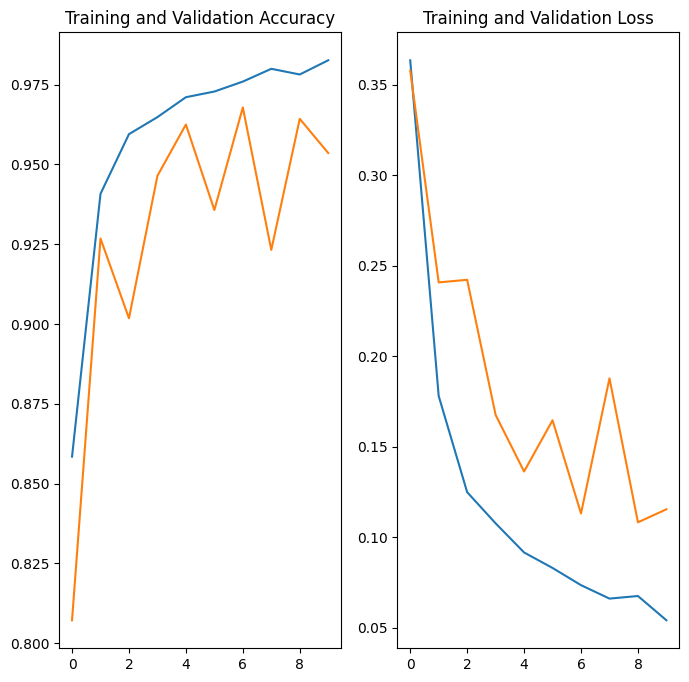

In [40]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
# Assuming you trained for 10 epochs, replace EPOCHS with 10 or the actual number of epochs you used:
plt.plot(range(10), acc, label='Training Accuracy') # Replace EPOCHS with 10
plt.plot(range(10), val_acc, label='Validation Accuracy') # Replace EPOCHS with 10


plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
# Replace EPOCHS with 10 or the actual number of epochs you used
plt.plot(range(10), loss, label='Training Loss')  # Replace EPOCHS with 10
plt.plot(range(10), val_loss, label='Validation Loss') # Replace EPOCHS with 10

plt.title('Training and Validation Loss')
plt.show()

In [42]:
# Now run inference on few random  images with confidence

import random
import numpy as np
from tensorflow.keras.preprocessing import image


# Number of random images to test
num_random_images = 16

# Get the image indices from the validation data loader
image_indices = list(range(len(val_data_loader.filenames)))

# Randomly select image indices
random_indices = random.sample(image_indices, num_random_images)

# Iterate through the selected images
for i in random_indices:
    img_path = val_data_loader.filepaths[i]
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Preprocess the image

    # Make predictions
    prediction = model.predict(x)
    predicted_class = np.argmax(prediction[0])
    confidence = prediction[0][predicted_class]

    # Print the results
    print(f"Image: {img_path}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence:.4f}")
    print("-" * 20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/Lichen-Planus-Drug-10.jpg
Predicted Class: 1
Confidence: 0.9999
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/NORMAL SKIN/1.5.jpg
Predicted Class: 0
Confidence: 0.9522
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/Lichen-Sclerosis-Vulva-1.jpg
Predicted Class: 1
Confidence: 1.0000
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/Lichen-Planus-Oral-8.jpg
Predicted Class: 1
Confidence: 0.9987
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/L

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


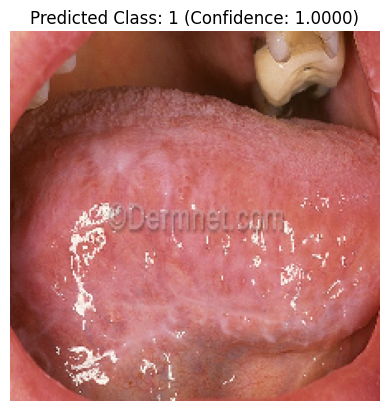

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/Lichen-Planus-Oral-33.jpg
Predicted Class: 1
Confidence: 1.0000
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


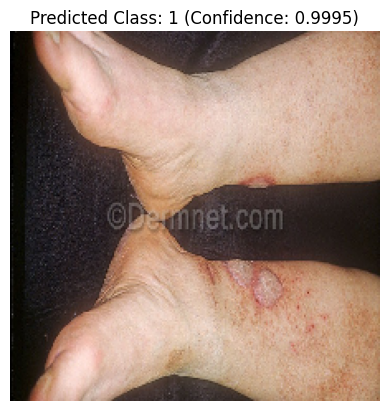

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/Lichen-Planus-Hypertrophic-21.jpg
Predicted Class: 1
Confidence: 0.9995
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


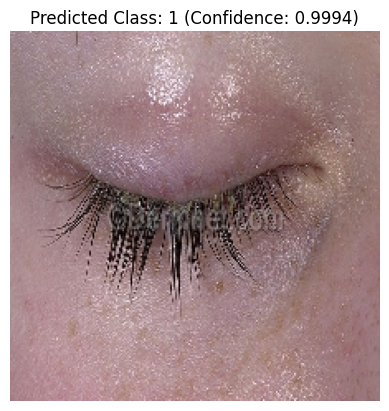

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/08SebDermLids0301041.jpg
Predicted Class: 1
Confidence: 0.9994
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


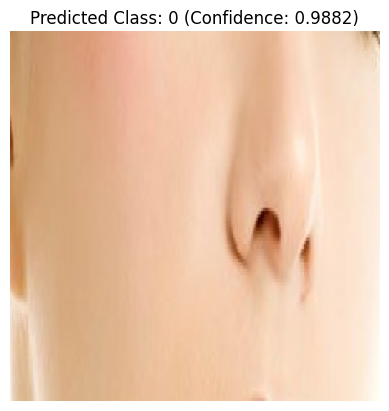

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/NORMAL SKIN/27.8.jpg
Predicted Class: 0
Confidence: 0.9882
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


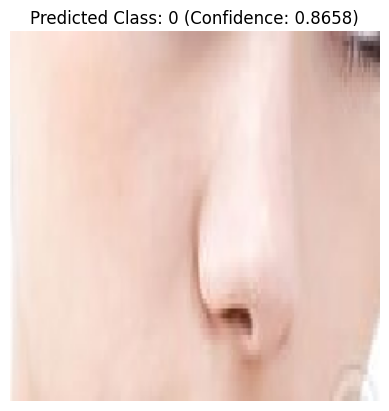

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/NORMAL SKIN/21.5.jpg
Predicted Class: 0
Confidence: 0.8658
--------------------


In [43]:
# Now run inference on few sample images suffle random image

import matplotlib.pyplot as plt



# Number of random images to test
num_random_images = 5

# Get the image indices from the validation data loader
image_indices = list(range(len(val_data_loader.filenames)))

# Randomly select image indices
random_indices = random.sample(image_indices, num_random_images)

# Iterate through the selected images
for i in random_indices:
    img_path = val_data_loader.filepaths[i]
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Preprocess the image

    # Make predictions
    prediction = model.predict(x)
    predicted_class = np.argmax(prediction[0])
    confidence = prediction[0][predicted_class]

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class} (Confidence: {confidence:.4f})")
    plt.axis('off')
    plt.show()

    print(f"Image: {img_path}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence:.4f}")
    print("-" * 20)

In [44]:
len(val_data_loader)

18

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


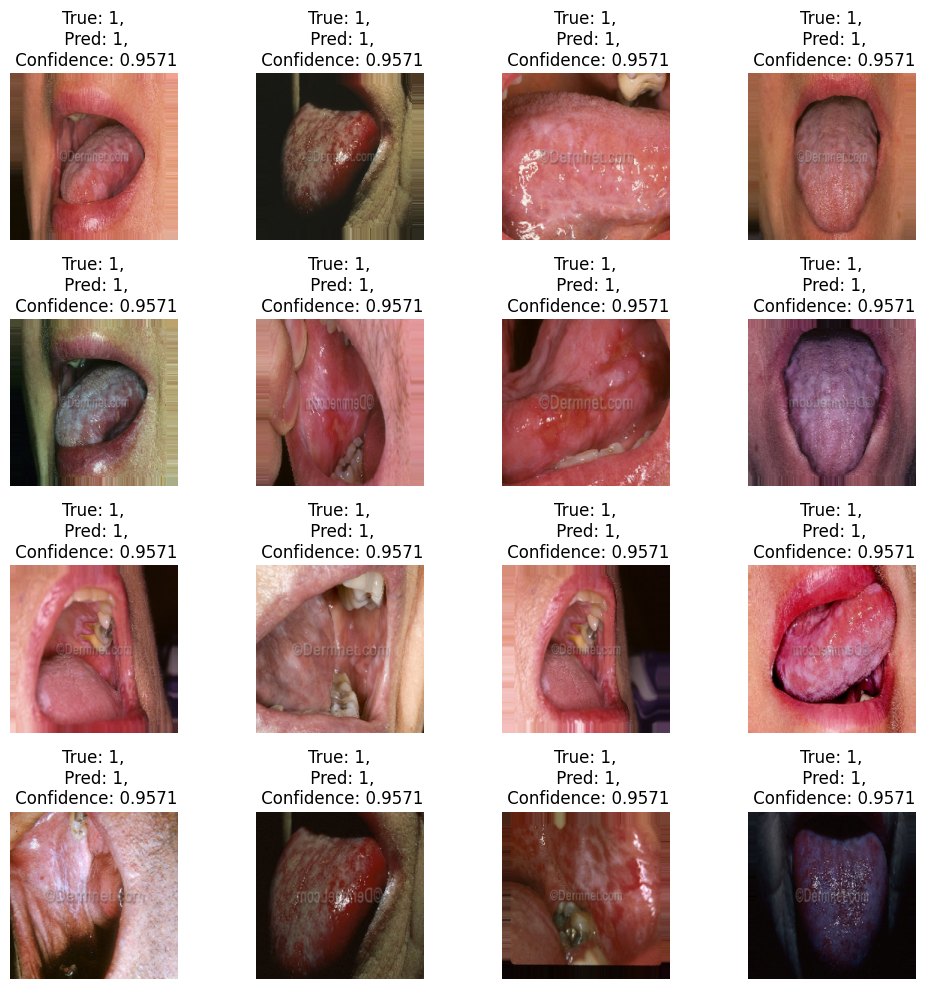

In [61]:
# prompt: Now run inference on few sample images

# Assuming 'model' and 'val_data_loader' are defined from the previous code

# Get a batch of images from the validation data
images, labels = next(val_data_loader)
# Randomly select image indices
random_indices = random.sample(image_indices, num_random_images)
# Predict the classes for the batch of images
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

# Display the images along with their true and predicted labels
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(16):
    ax = axes[i // 4, i % 4]
    ax.imshow(images[i])
    ax.set_title(f"True: {int(labels[i])},\n Pred: {int(predicted_classes[i])},\n Confidence: {confidence:.4f}")
    ax.axis('off')
# print(f"Confidence: {confidence:.4f}")
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


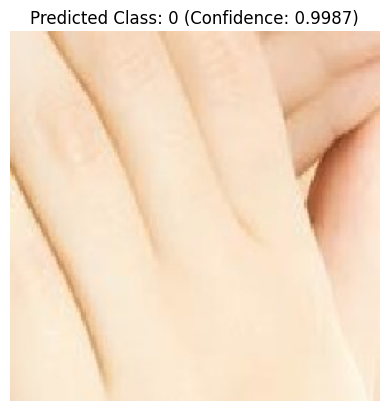

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/NORMAL SKIN/27.10.jpg
Predicted Class: 0
Confidence: 0.9987
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


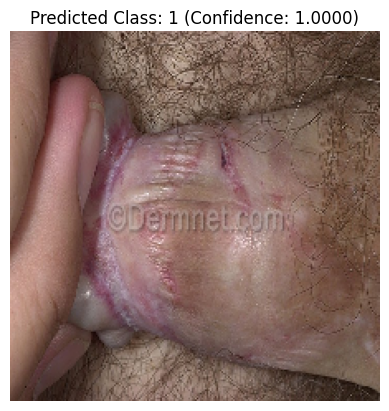

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/Lichen-Sclerosus-Penis-20.jpg
Predicted Class: 1
Confidence: 1.0000
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


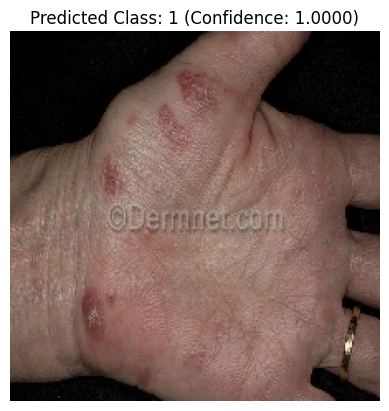

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/Lichen-Planus-Drug-12.jpg
Predicted Class: 1
Confidence: 1.0000
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


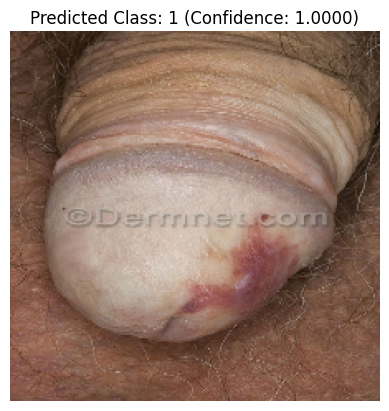

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/Lichen-Sclerosus-Penis-9.jpg
Predicted Class: 1
Confidence: 1.0000
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


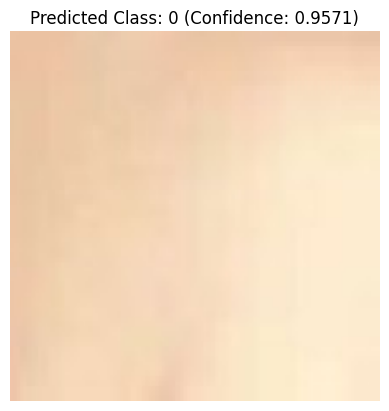

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/NORMAL SKIN/21.3.jpg
Predicted Class: 0
Confidence: 0.9571
--------------------


In [58]:
# prompt: Now run inference on few sample images suffle random image

import matplotlib.pyplot as plt

# ... (your existing code) ...

# Assuming 'model' and 'val_data_loader' are defined from the previous code
# ... (your existing code) ...

# Number of random images to test
num_random_images = 5

# Get the image indices from the validation data loader
image_indices = list(range(len(val_data_loader.filenames)))

# Randomly select image indices
random_indices = random.sample(image_indices, num_random_images)

# Iterate through the selected images
for i in random_indices:
    img_path = val_data_loader.filepaths[i]
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Preprocess the image

    # Make predictions
    prediction = model.predict(x)  # Pass the preprocessed image data 'x' here
    predicted_class = np.argmax(prediction[0])
    confidence = prediction[0][predicted_class]

    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class} (Confidence: {confidence:.4f})")
    plt.axis('off')
    plt.show()

    print(f"Image: {img_path}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence:.4f}")
    print("-" * 20)

In [ ]:
#  predicted_class, confidence = predict(model, images[i])
#     actual_class = class_names[int(labels[i])] # Use class_names and cast label to int

#     # Add title to the plot with predicted and actual class names
#     plt.title(f"Predicted: {predicted_class},\n Actual: {actual_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


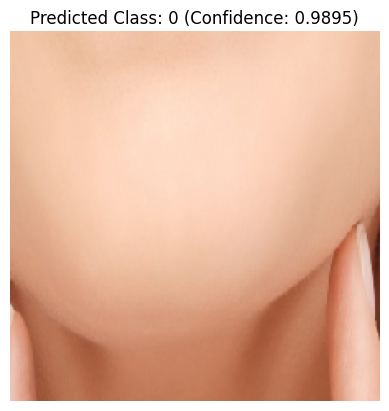

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/NORMAL SKIN/1.6.jpg
Predicted Class: 0
Confidence: 0.9895
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


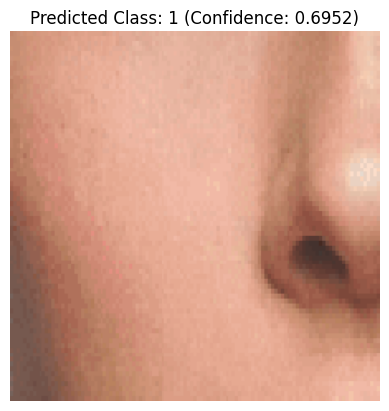

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/NORMAL SKIN/18.10.png
Predicted Class: 1
Confidence: 0.6952
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


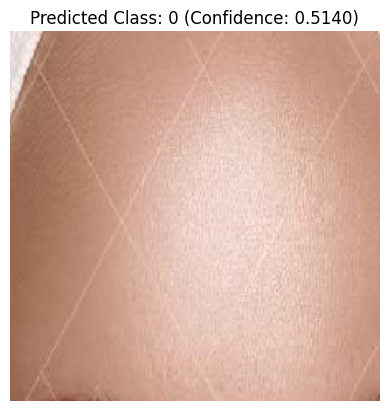

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/NORMAL SKIN/12.8.jpg
Predicted Class: 0
Confidence: 0.5140
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


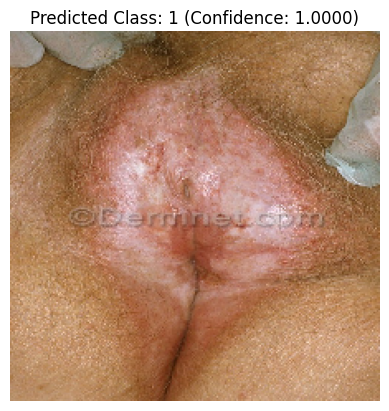

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/Lichen-Sclerosis-Vulva-22.jpg
Predicted Class: 1
Confidence: 1.0000
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


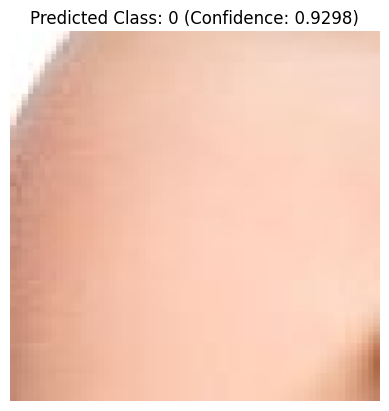

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/NORMAL SKIN/1.9.jpg
Predicted Class: 0
Confidence: 0.9298
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


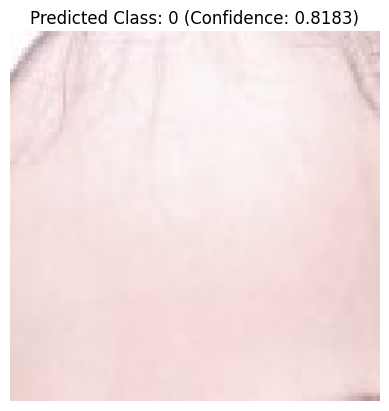

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/NORMAL SKIN/21.10.jpg
Predicted Class: 0
Confidence: 0.8183
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


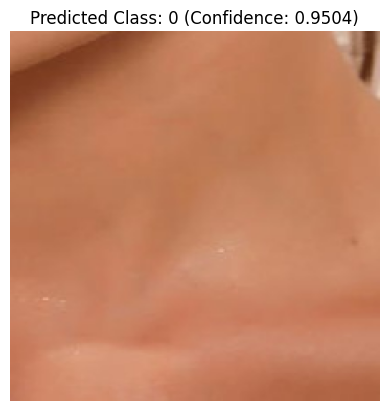

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/NORMAL SKIN/23.1.jpg
Predicted Class: 0
Confidence: 0.9504
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


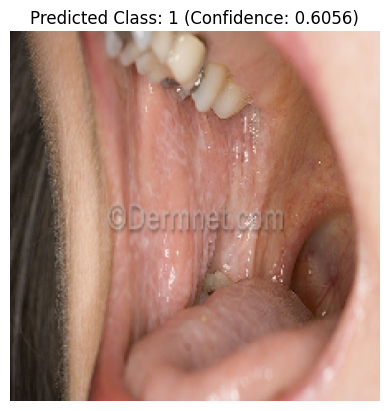

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/Lichen-Planus-Oral-11.jpg
Predicted Class: 1
Confidence: 0.6056
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


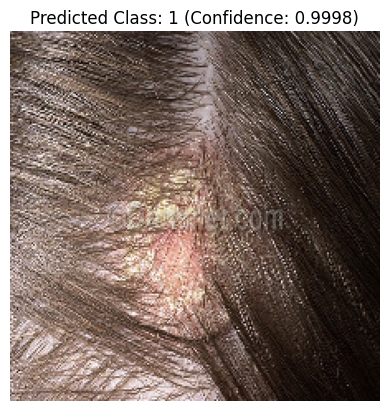

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/08SebDermScalp1.jpg
Predicted Class: 1
Confidence: 0.9998
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


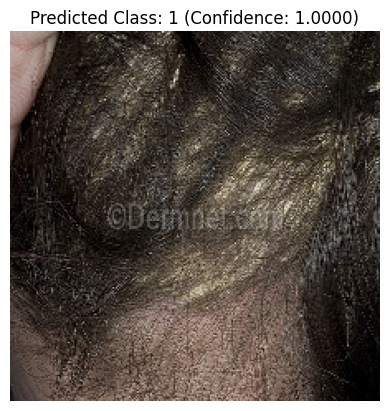

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/08sebKerm1122049.jpg
Predicted Class: 1
Confidence: 1.0000
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


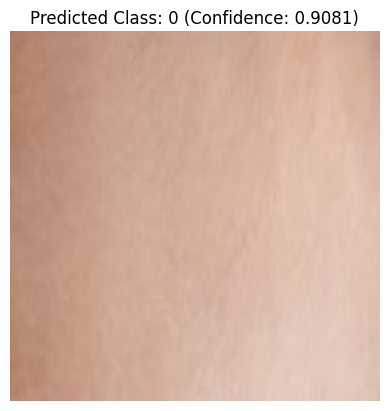

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/NORMAL SKIN/24.10.jpg
Predicted Class: 0
Confidence: 0.9081
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


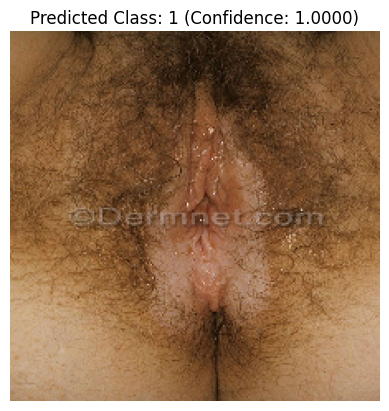

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/Lichen-Sclerosis-Vulva-18.jpg
Predicted Class: 1
Confidence: 1.0000
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


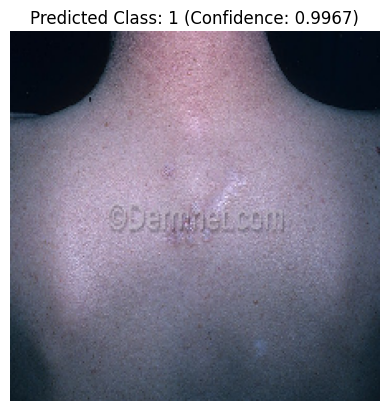

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/Lichen-Sclerosus-Skin-105.jpg
Predicted Class: 1
Confidence: 0.9967
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


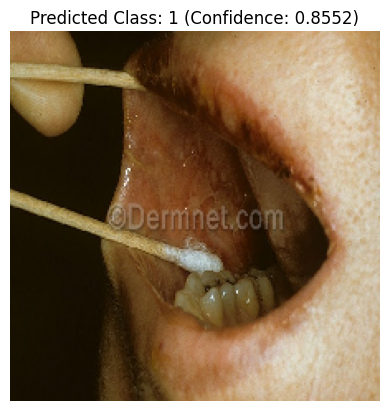

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/Lichen-Planus-Oral-27.jpg
Predicted Class: 1
Confidence: 0.8552
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


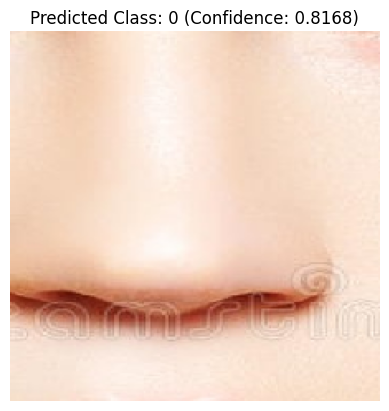

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/NORMAL SKIN/14.7.jpg
Predicted Class: 0
Confidence: 0.8168
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


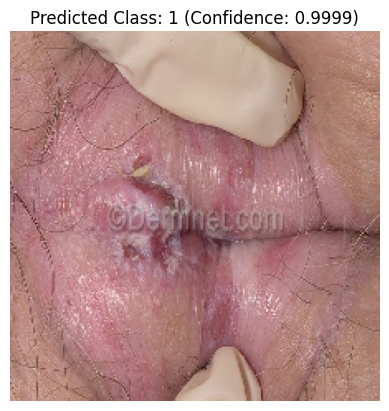

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/Lichen-Sclerosis-Vulva-12.jpg
Predicted Class: 1
Confidence: 0.9999
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


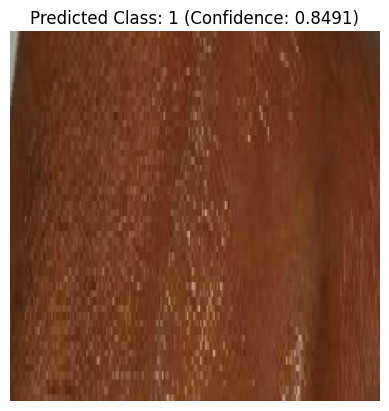

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/NORMAL SKIN/20.2.jpg
Predicted Class: 1
Confidence: 0.8491
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


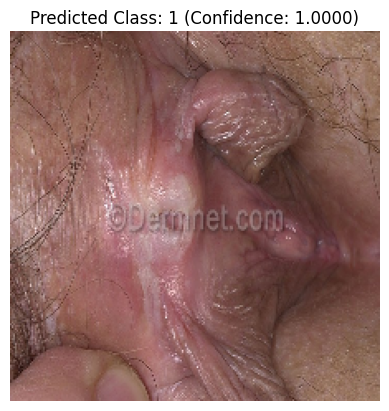

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/PSORIASIS/Lichen-Sclerosis-Vulva-5.jpg
Predicted Class: 1
Confidence: 1.0000
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


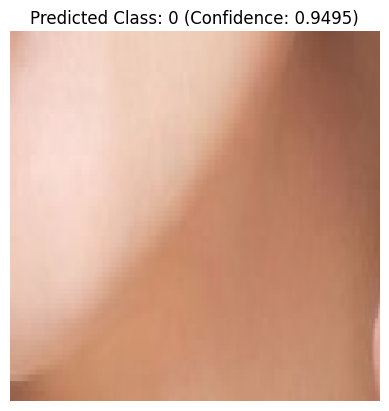

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/NORMAL SKIN/22.6.jpg
Predicted Class: 0
Confidence: 0.9495
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


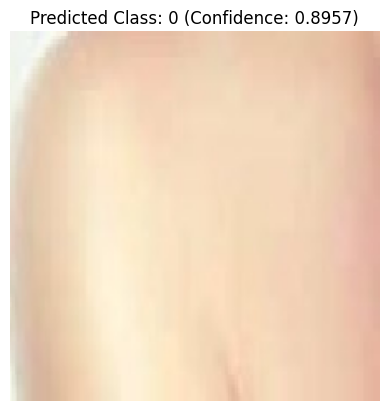

Image: /content/drive/MyDrive/Ajay Majhi/Psoriasis detection/PSORIASIS AND NORMAL SKIN/NORMAL SKIN/21.1.jpg
Predicted Class: 0
Confidence: 0.8957
--------------------


KeyboardInterrupt: 

In [63]:
import time


while True:
    # Number of random images to test
    num_random_images = 5

    # Get the image indices from the validation data loader
    image_indices = list(range(len(val_data_loader.filenames)))

    # Randomly select image indices
    random_indices = random.sample(image_indices, num_random_images)

    # Iterate through the selected images
    for i in random_indices:
        img_path = val_data_loader.filepaths[i]
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x / 255.0  # Preprocess the image



        # Make predictions
        prediction = model.predict(x)
        predicted_class = np.argmax(prediction[0])
        confidence = prediction[0][predicted_class]

        # Display the image and prediction
        plt.imshow(img)
        plt.title(f"Predicted Class: {predicted_class} (Confidence: {confidence:.4f})")
        plt.axis('off')
        plt.show()

        print(f"Image: {img_path}")
        print(f"Predicted Class: {predicted_class}")
        print(f"Confidence: {confidence:.4f}")
        print("-" * 20)

    # Wait for a specified amount of time before the next iteration
    time.sleep(1) # Wait for 9 seconds


In [ ]:
# def predict(model, img):
#     img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
#     img_array = tf.expand_dims(img_array, 0)

#     predictions = model.predict(img_array)

#     predicted_class = class_names[np.argmax(predictions[0])]
#     confidence = round(100 * (np.max(predictions[0])), 2)
#     return predicted_class, confidence
